You have been provided with an excel book on Cassava Yield Data.

1.Explore the dataset showing the distribution of all the variables (“Sesn” to "TotalTuberperHectare"). Further explore the variables for missing information and outliers. Go ahead and transform the dataset to handle missing information and outliers.

we start by importing the necessary libraries: Pandas is mostly used for data analysis tasks in Python. NumPy is mostly used for working with Numerical values as it makes it easy to apply mathematical functions. The functions below support us to import these libraries and to enable us read our dataset which is saved as Cassava_Yield_Data.xlsx. 

In [603]:
import numpy as numpy# this is about importing the necessary libraries. pandas and numpy 
import pandas as pd
import matplotlib.pyplot as plt
import pyreadstat
import seaborn as sns




Reading our dataset thats saved as Cassava_Yield_Data: The datasheet shows the performance of cassava in different seasons under different tillage methods and fertilizer applications in some locations

In [604]:
df = pd.read_excel('Cassava_Yield_Data.xlsx')#to read the dataset thats saved in an excell workbook

We want to start by exploring our data and below shows us the shape of our data. this helps us to visualise our dataset

In [605]:
df.shape# to show us the actual shape of our data. results below

(115, 20)

In [606]:
data.info()# we want to see how our dataset looks like

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sesn                   115 non-null    int64  
 1   locn                   115 non-null    int64  
 2   block                  115 non-null    int64  
 3   rep                    115 non-null    int64  
 4   tillage                115 non-null    object 
 5   ferT                   115 non-null    object 
 6   Plants_harvested       115 non-null    int64  
 7   No_bigtubers           115 non-null    int64  
 8   Weigh_bigtubers        115 non-null    float64
 9   No_mediumtubers        115 non-null    int64  
 10  Weight_mediumtubers    115 non-null    float64
 11  No_smalltubers         115 non-null    int64  
 12  Weight_smalltubers     115 non-null    float64
 13  Totaltuberno           115 non-null    int64  
 14  AV_tubers_Plant        115 non-null    float64
 15  Total_

In [607]:
data.describe()#to print results showing how our data is distributed

,Sesn,locn,block,rep,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.000000,115.000000
mean,1.521739,1.521739,2.043478,2.043478,18.565217,4.000000,0.614783,49.521739,2.771304,146.252174,2.511304,199.773913,10.525355,5.897391,4.486957,10000.0,13094.339623,431822.336810
std,0.501713,0.501713,0.809931,0.809931,6.442908,7.367544,1.174678,29.920757,1.774911,87.351663,1.303354,102.555168,3.248495,3.040702,0.485134,0.0,6896.716668,184839.313619
min,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.500000,57.000000,3.800000,1.000000,4.200000,10000.0,2380.952381,135714.285714
25%,1.000000,1.000000,1.000000,1.000000,14.000000,0.000000,0.000000,26.500000,1.300000,84.000000,1.500000,115.500000,8.027778,3.400000,4.200000,10000.0,8095.238095,275000.000000
50%,2.000000,2.000000,2.000000,2.000000,18.000000,0.000000,0.000000,44.000000,2.500000,109.000000,2.100000,179.000000,10.666667,6.000000,4.200000,10000.0,11904.761905,419047.619048
75%,2.000000,2.000000,3.000000,3.000000,28.000000,5.500000,0.700000,65.500000,3.950000,221.000000,3.600000,273.500000,12.973684,8.150000,5.300000,10000.0,16421.832884,589285.714286
max,2.000000,2.000000,3.000000,3.000000,28.000000,41.000000,7.000000,126.000000,8.100000,376.000000,5.400000,443.000000,19.200000,14.100000,5.300000,10000.0,33571.428571,835849.056604


Below exploring our data, by sampling descriptive statistics of the variable location

In [608]:
data["locn"].describe()

count    115.000000
mean       1.521739
std        0.501713
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: locn, dtype: float64

below searching for any duplicated information in our dataset where we can focus to start cleaning the data

In [609]:
df.duplicated()#to detect if we have any duplicated data in variables

0      False
1      False
2      False
3      False
4      False
       ...  
110    False
111    False
112    False
113    False
114    False
Length: 115, dtype: bool

below searching for any missing information in the entire dataset. this is done by loading the dataset, search for any outliers and any variables with missing information. The idea is to start cleaning the dataset by identifying any Missing values that can bias the results of our statistical models and can result in decreased accuracy. That is why we must handle these values in the correct way, so that the data is imputed correctly

the question requires us to seek for outliers.
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.
for example: in a data range of 23, 25, 27, 2, 30, 99,32, the outliers in such a range are 2 and 99 because they lie an abnormal distance from the other values that seem to be in a normal sequence.

we can identify outliers by using boxplot graphs and below requires us to import the necessary libraries, pandas, numpy and matplotlib. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. Creates publication quality plots. Make interactive figures that can zoom, pan, update. this is the reason why we have to import this library to enable us to formulate these graphs

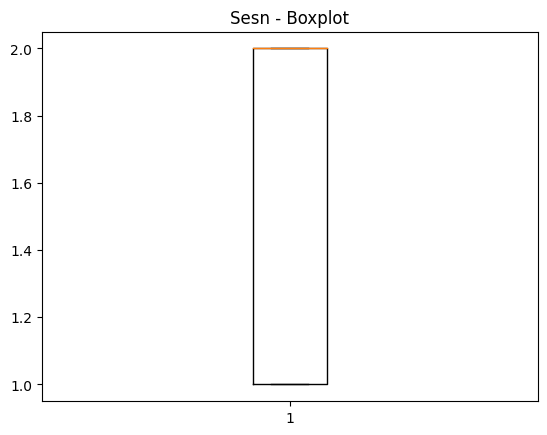

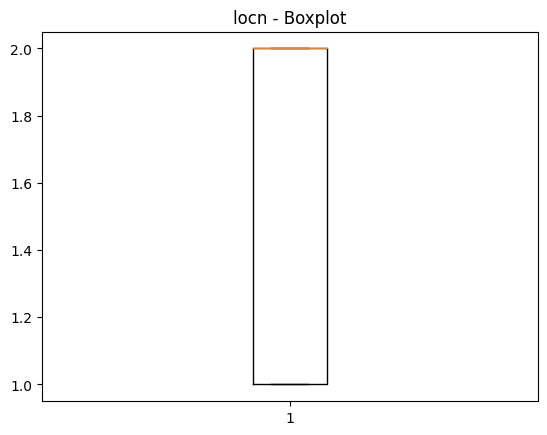

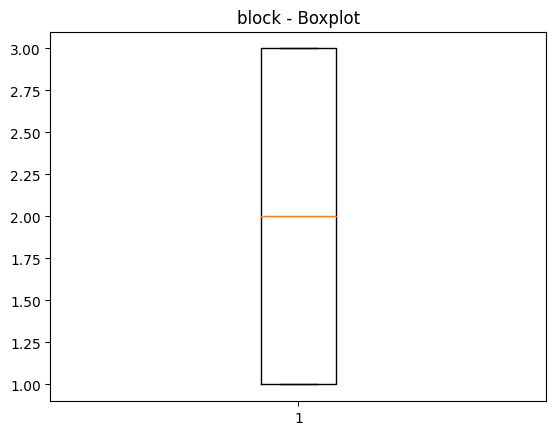

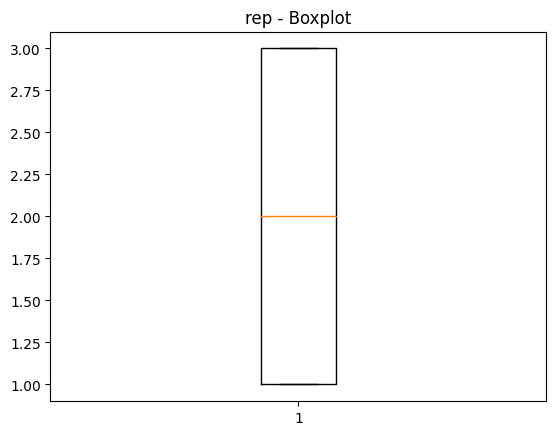

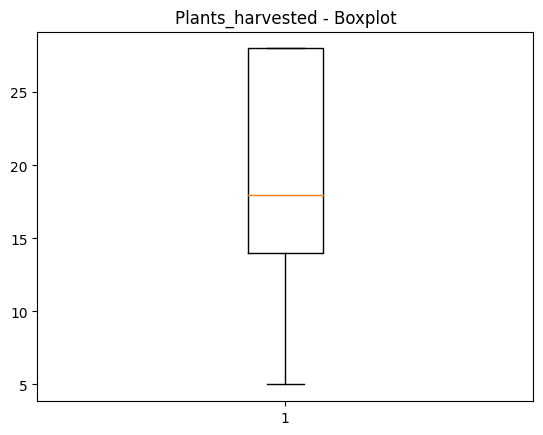

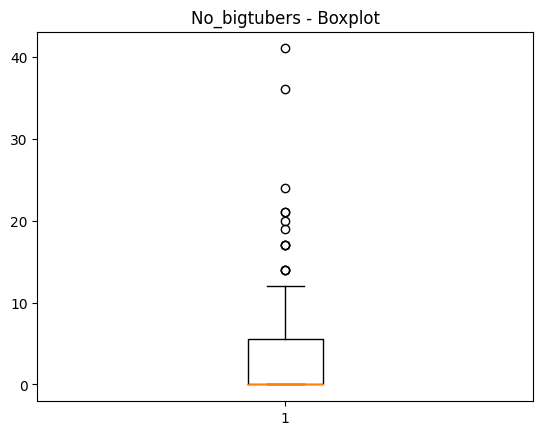

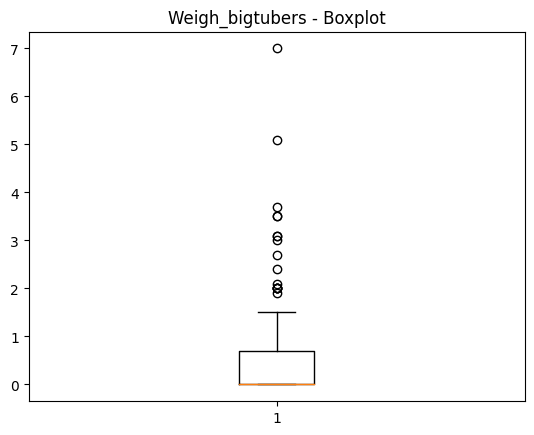

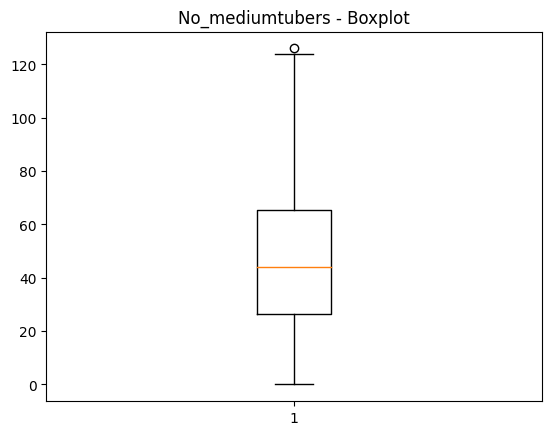

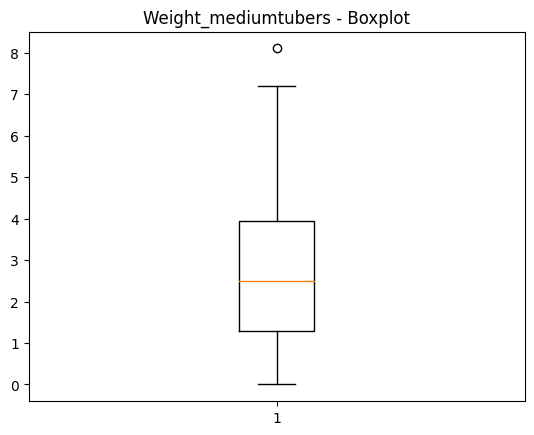

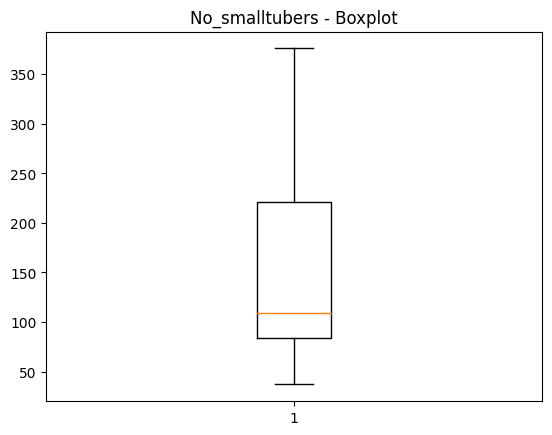

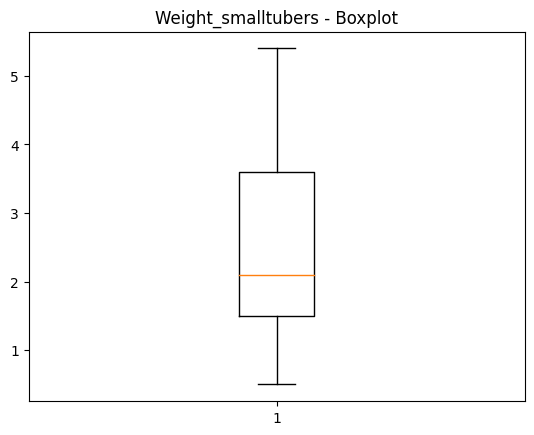

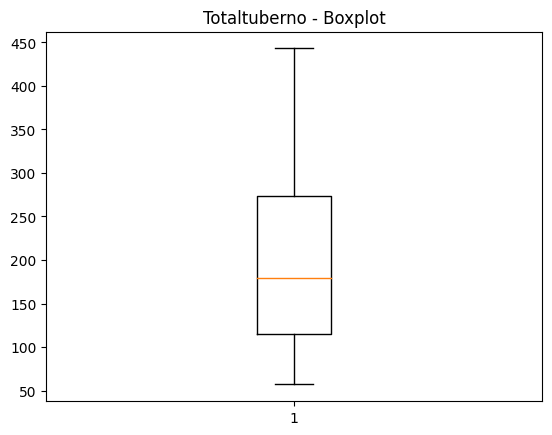

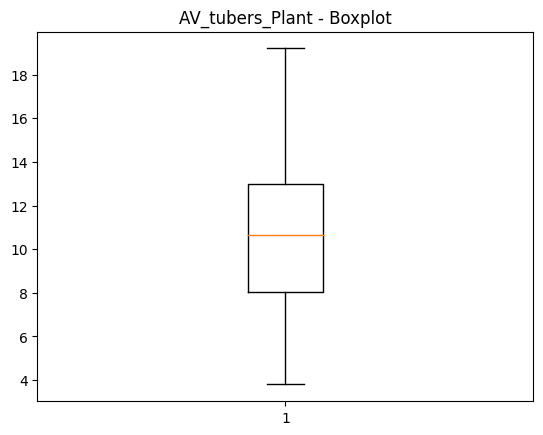

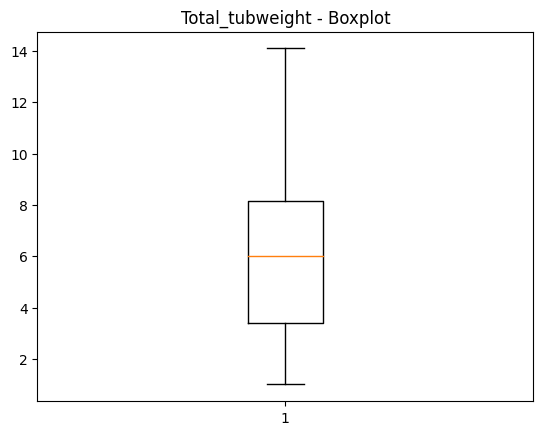

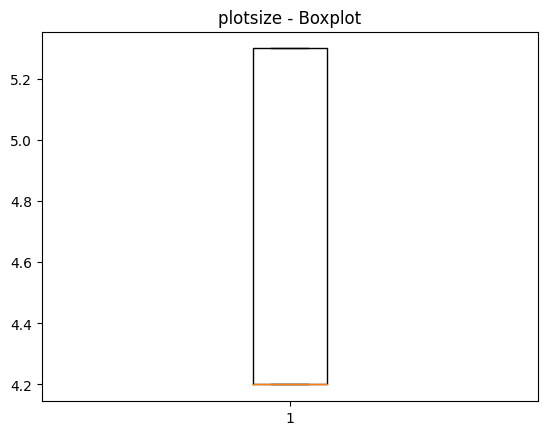

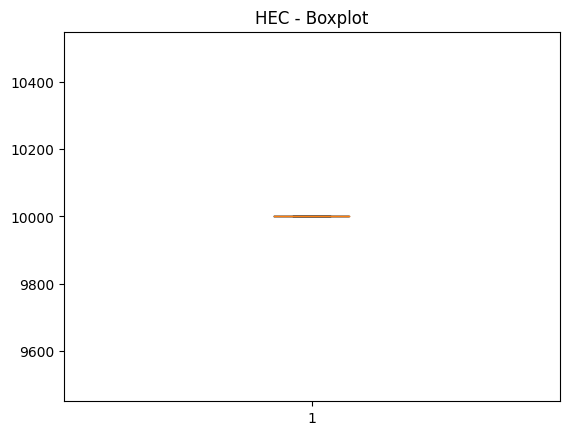

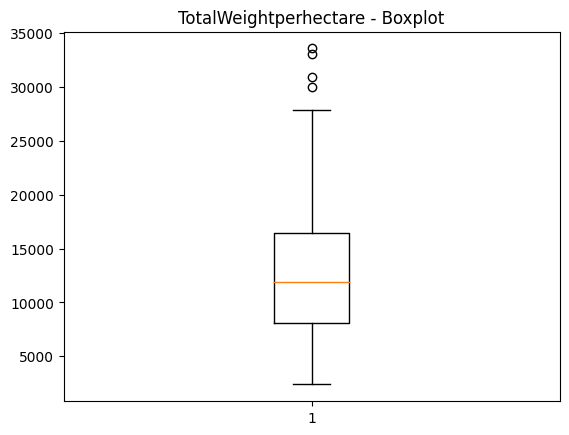

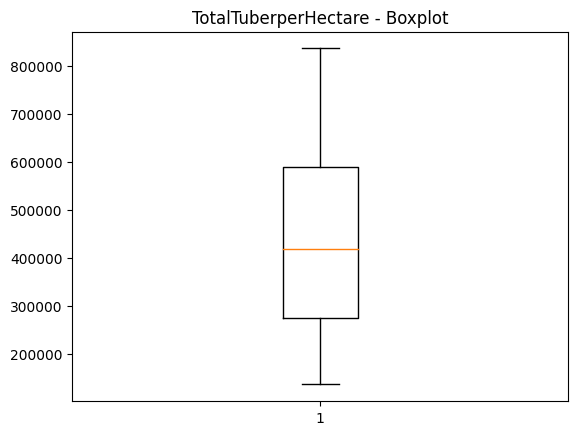

In [610]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('Cassava_Yield_Data.xlsx')

# Show outliers using boxplot
def show_outliers_boxplot(data):
    numeric_columns = data.select_dtypes(include=np.number).columns
    
    # Create a boxplot for each numeric column
    for column in numeric_columns:
        plt.figure()
        plt.boxplot(data[column].dropna())
        plt.title(column + " - Boxplot")
        plt.show()

show_outliers_boxplot(data)


the above shows a lot of outliers in the boxplots, mainly in variables like total weight per hectare, weight_medium tubers,
weightbigtubers and no_bigtubers.

In [611]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_excel('Cassava_Yield_Data.xlsx')

# Show outliers
def show_outliers(data):
    # Calculate z-scores for each numeric column
    z_scores = (data.select_dtypes(include=np.number) - data.select_dtypes(include=np.number).mean()) / data.select_dtypes(include=np.number).std()
    
    # Find rows with z-scores greater than a threshold (e.g., 3)
    outlier_threshold = 3
    outliers = df[(z_scores.abs() > outlier_threshold).any(axis=1)]
    
    return outliers

outliers = show_outliers(data)
print("Outliers:")
print(outliers)

# Show missing information
def show_missing_info(data):
    missing_info = df.isnull().sum()
    return missing_info[missing_info > 0]

missing_info = show_missing_info(data)
print("\nMissing Information:")
print(missing_info)


Outliers:
    Sesn  locn  block  rep tillage    ferT  Plants_harvested  No_bigtubers   
42     1     1      3    3     conv  F2150                20            36  \
43     1     1      3    3     conv  F4250                19            41   
53     1     1      3    3  minimum  F4250                19            24   

    Weigh_bigtubers  No_mediumtubers  Weight_mediumtubers  No_smalltubers   
42              5.1              124                  7.0             109  \
43              7.0               74                  4.5             108   
53              3.7              126                  8.1             104   

    Weight_smalltubers  Totaltuberno  AV_tubers_Plant  Total_tubweight   
42                 1.8           269        13.450000             13.9  \
43                 1.1           223        11.736842             12.6   
53                 2.3           254        13.368421             14.1   

    plotsize    HEC  TotalWeightperhectare  TotalTuberperHectare  
42  

having identified outliers in some colums of the dataset, the process below helps to remove the outliers and hence creating a new cleaned dataset.

In [612]:
# Drop outliers and missing information
def drop_outliers_and_missing(df):
    outliers = show_outliers(df)
    missing_info = show_missing_info(df)
    
    # Combine outlier rows and rows with missing information
    rows_to_drop = pd.concat([outliers, df[df.isnull().any(axis=1)]])
    
    # Drop the identified rows
    cleaned_df = df.drop(rows_to_drop.index)
    
    return cleaned_df

cleaned_df = drop_outliers_and_missing(df)
print("\nCleaned Dataset:")
print(cleaned_df)



Cleaned Dataset:
     Sesn  locn  block  rep tillage    ferT  Plants_harvested  No_bigtubers   
0       2     1      1    1     conv  F2150                28             0  \
1       2     1      1    1     conv  F1100                28             0   
2       2     1      1    1     conv  F3200                28             2   
3       2     1      1    1     conv  F5300                28             6   
4       2     1      1    1     conv  F4250                28             3   
..    ...   ...    ...  ...      ...    ...               ...           ...   
110     2     2      3    3     conv  F1100                19             0   
111     2     2      3    3     conv  F5300                16             0   
112     2     2      3    3     conv  F2150                13             0   
113     2     2      3    3     conv  F4250                20             0   
114     2     2      3    3     conv  F3200                19             0   

     Weigh_bigtubers  No_mediumtu

below: searching for missing information from our dataset and below results show that we dont have missing values in the dataset. the function searches for missing information and the outcome is no missing information because its been cleaned as seen in previous 

In [613]:
missing_values = data.isnull().sum()
print(missing_values)


Sesn                     0
locn                     0
block                    0
rep                      0
tillage                  0
ferT                     0
Plants_harvested         0
No_bigtubers             0
Weigh_bigtubers          0
No_mediumtubers          0
Weight_mediumtubers      0
No_smalltubers           0
Weight_smalltubers       0
Totaltuberno             0
AV_tubers_Plant          0
Total_tubweight          0
plotsize                 0
HEC                      0
TotalWeightperhectare    0
TotalTuberperHectare     0
dtype: int64


Question 2:  

a: Investigate the relationships between the following variables using displays (graphs) and statistical tests;

Two continuous variables:

below we are testing the relationship between two continuos variables. 
in this case, the selected variables are: 'Weigh_bigtubers' and AV_tubers_Plant and a scatter plot below is used in this comparison

the reason for my selection is to try and find out how Weight of big tubers of cassava harvested ranks in the Average number of tubers per cassava plant harvested. i am mainly interested in knowing the farming patterns and perhaps to identify the right cassava brand that can grow big and could be recommended to farmers

A Scatter plot is the chart used when you want to visualize the relationship between two continuous variables in data. Where the target variable is a continuous variable. So if you want to check which continuous predictor has a clear relationship with the target variable, then you look at the scatter plots.

Consider the below scenario Here the target variable is Weigh_bigtubers and we are trying to predict it based on the number of AV_tubers_Plant/ the average of tubers planted. we want to know how many big tubers come out of the average planted.





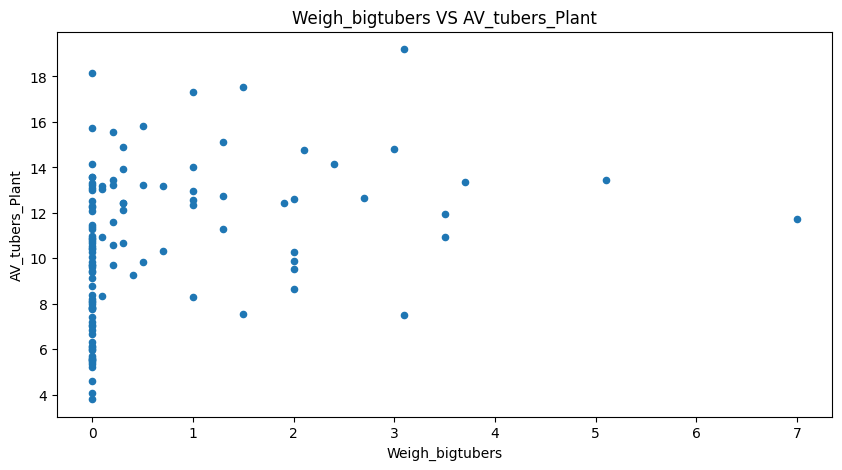

In [614]:
ContinuousCols=['Weigh_bigtubers']

# Plotting scatter chart for each Weigh_bigtubers vs Av_tubers_plant
for predictor in ContinuousCols:
    data.plot.scatter(x=predictor, y='AV_tubers_Plant', figsize=(10,5), title=predictor+" VS "+ 'AV_tubers_Plant')

looking at the above scatter plot, its harder to investigate the relationship between the two continuous variables. below i emply a tool called the correlation matrix to support analyse the relationship

In [615]:
ContinuousVariables=['Weigh_bigtubers','AV_tubers_Plant']

CorrelationData=data[ContinuousVariables].corr()
CorrelationData

,Weigh_bigtubers,AV_tubers_Plant
Weigh_bigtubers,1.000000,0.311747
AV_tubers_Plant,0.311747,1.000000


In [616]:
CorrelationData['Weigh_bigtubers'][abs(CorrelationData['AV_tubers_Plant']) > 0.5 ]

AV_tubers_Plant    0.311747
Name: Weigh_bigtubers, dtype: float64

From the statistical point of view, the results above show that there is low correlation between the variables Weigh_bigtubers and Av_tubers_plant. this is because the correlation generated an "r" value which is

r = 0.0-0.3 which interpretes a low correlation. low correlation means that the variables are hardly related






question 2:

b--To investigate the relationship between--One continuous variable and one categorical variable, we are to use a Box plot
the categorical variable chosen here is Fertiliser vs the continuous variable called plants harvested.

<Axes: title={'center': 'Plants_harvested'}, xlabel='ferT'>

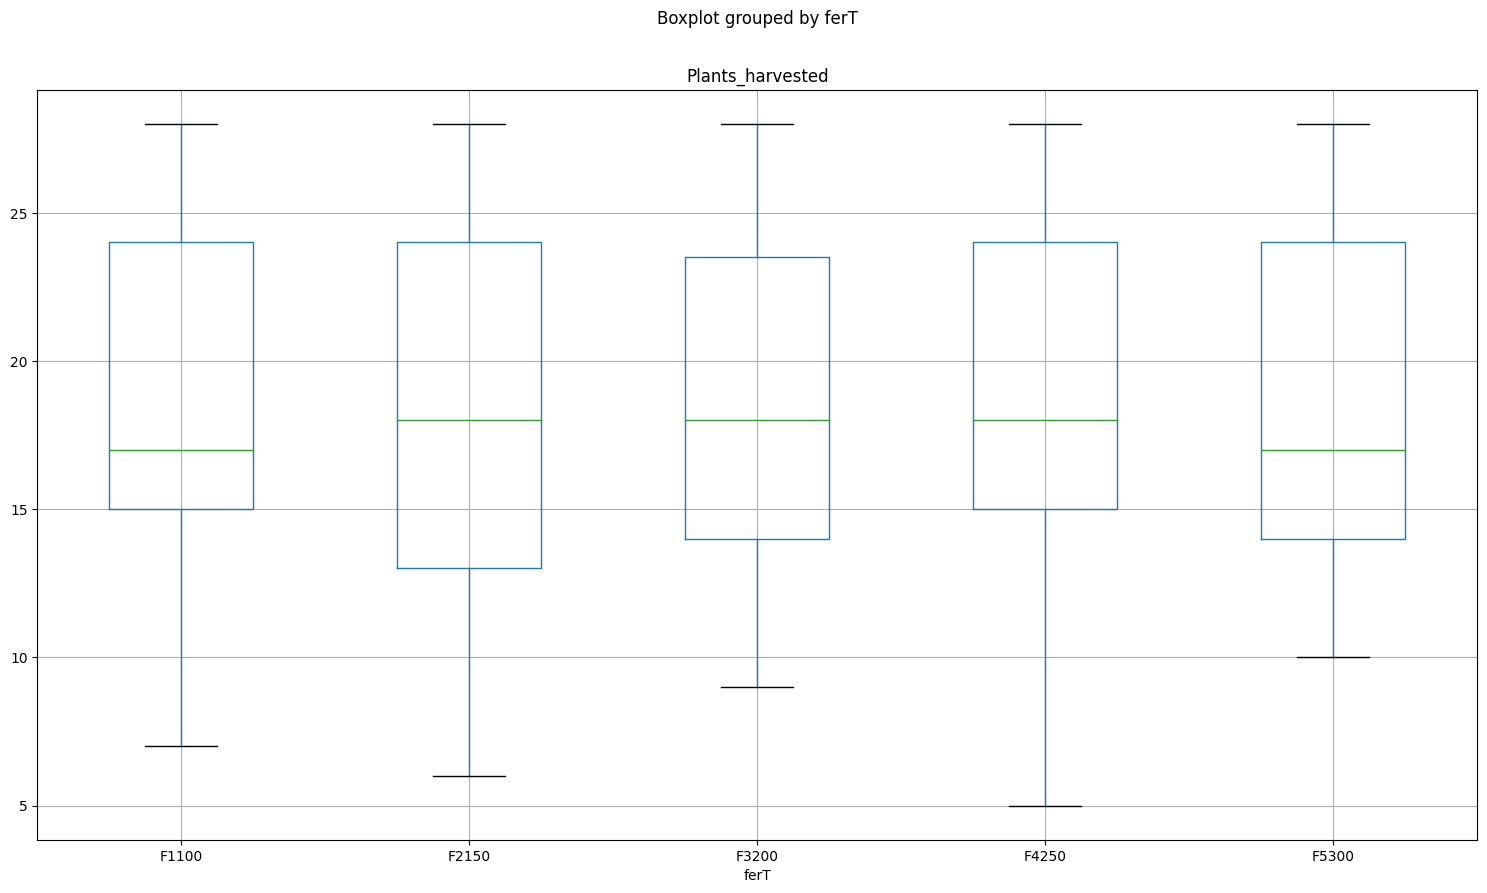

In [617]:
data.boxplot(column='Plants_harvested', by='ferT', figsize=(18,10))

Now lets further examine the relationship between the fertliser and the plants harvested using the ANOVA tool.

In [618]:
CategoricalPredictorList=['ferT']
FunctionAnova(inpData=data, 
              TargetVariable='Plants_harvested', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

ferT is NOT correlated with Plants_harvested | P-Value: 0.9935179493101193


[]

part 3 of question 1 requires to find the relationship between Two categorical variables.
this is to be tested by using grouped bar plots.

In [619]:
import pandas as pd 
cat_cols = data[['ferT','tillage ']]


In [620]:
import pandas as pd 
data_cat = data[['ferT','tillage ']]
data_cat

,ferT,tillage
0,F2150,conv
1,F1100,conv
2,F3200,conv
3,F5300,conv
4,F4250,conv
...,...,...
110,F1100,conv
111,F5300,conv
112,F2150,conv
113,F4250,conv


In [621]:
import pandas as pd 

In [622]:
CrosstabResult=pd.crosstab(index=data_cat['tillage '],columns=data_cat['ferT'])
print(CrosstabResult)

ferT      F1100  F2150  F3200  F4250  F5300
tillage                                    
conv         12     12     12     12     12
minimum      11     11     11     11     11


<Axes: xlabel='tillage '>

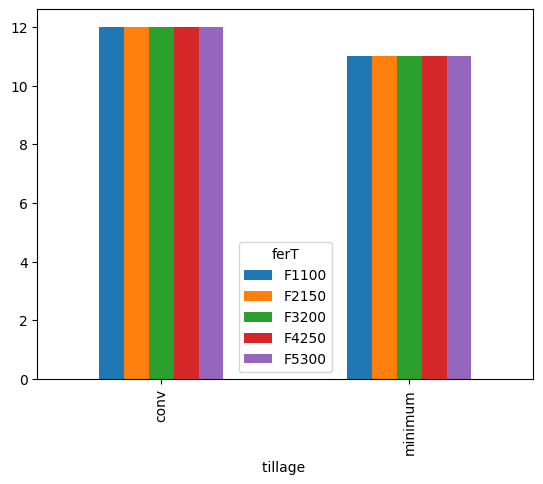

In [623]:
import matplotlib
%matplotlib inline
CrosstabResult.plot.bar()

below is the statistical formula to interprete the relationship between the two categorical variables (tillage and fertilizer). the result from the P-value--The P value, or calculated probability, is the probability of finding the observed, or more extreme, results when the null hypothesis (H 0) of a study question is true – the definition of 'extreme' depends on how the hypothesis is being tested. P is also described in terms of rejecting H0 when it is actually true, however, it is not a direct probability of this state.

In [624]:
from scipy.stats import chi2_contingency
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.0


for the case above: P-value is greater than 0.05, hence tillage and fertiliser are not correlated at all







Question 3: Cassava farmers in Soroti would like to know the following aspects to help inform their farming practices;

a. Does fertilizer application affect the projected “TotalWeightperhectare” and the "TotalTuberperHectare"

below graphs are separated to establish the direct relationship between variable fertilizer and total weight per hectare, as well as the total tuber per hectare

<Axes: title={'center': 'TotalTuberperHectare'}, xlabel='ferT'>

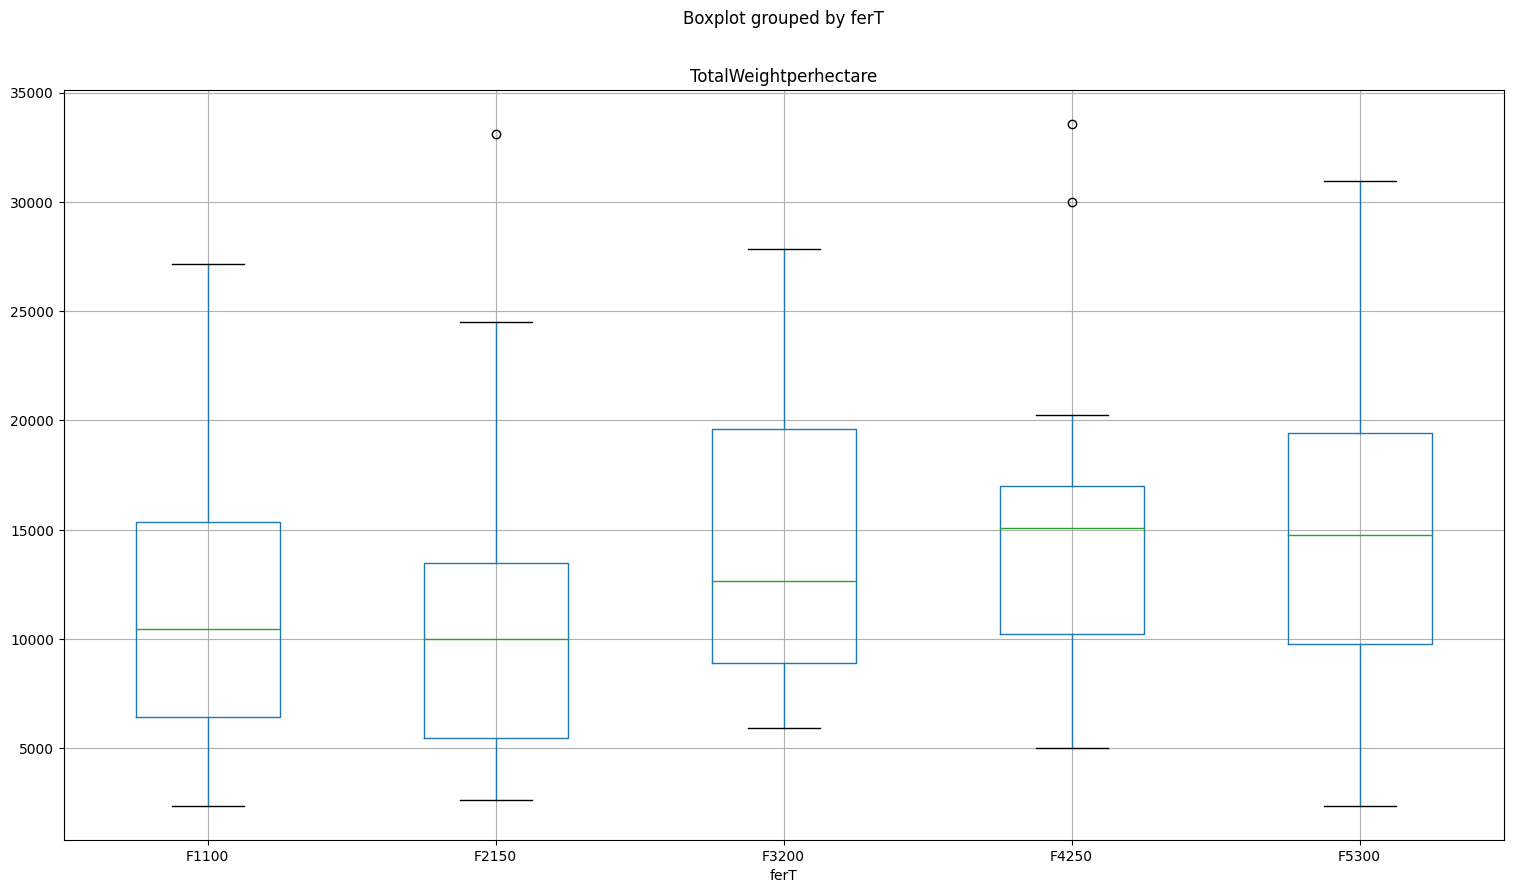

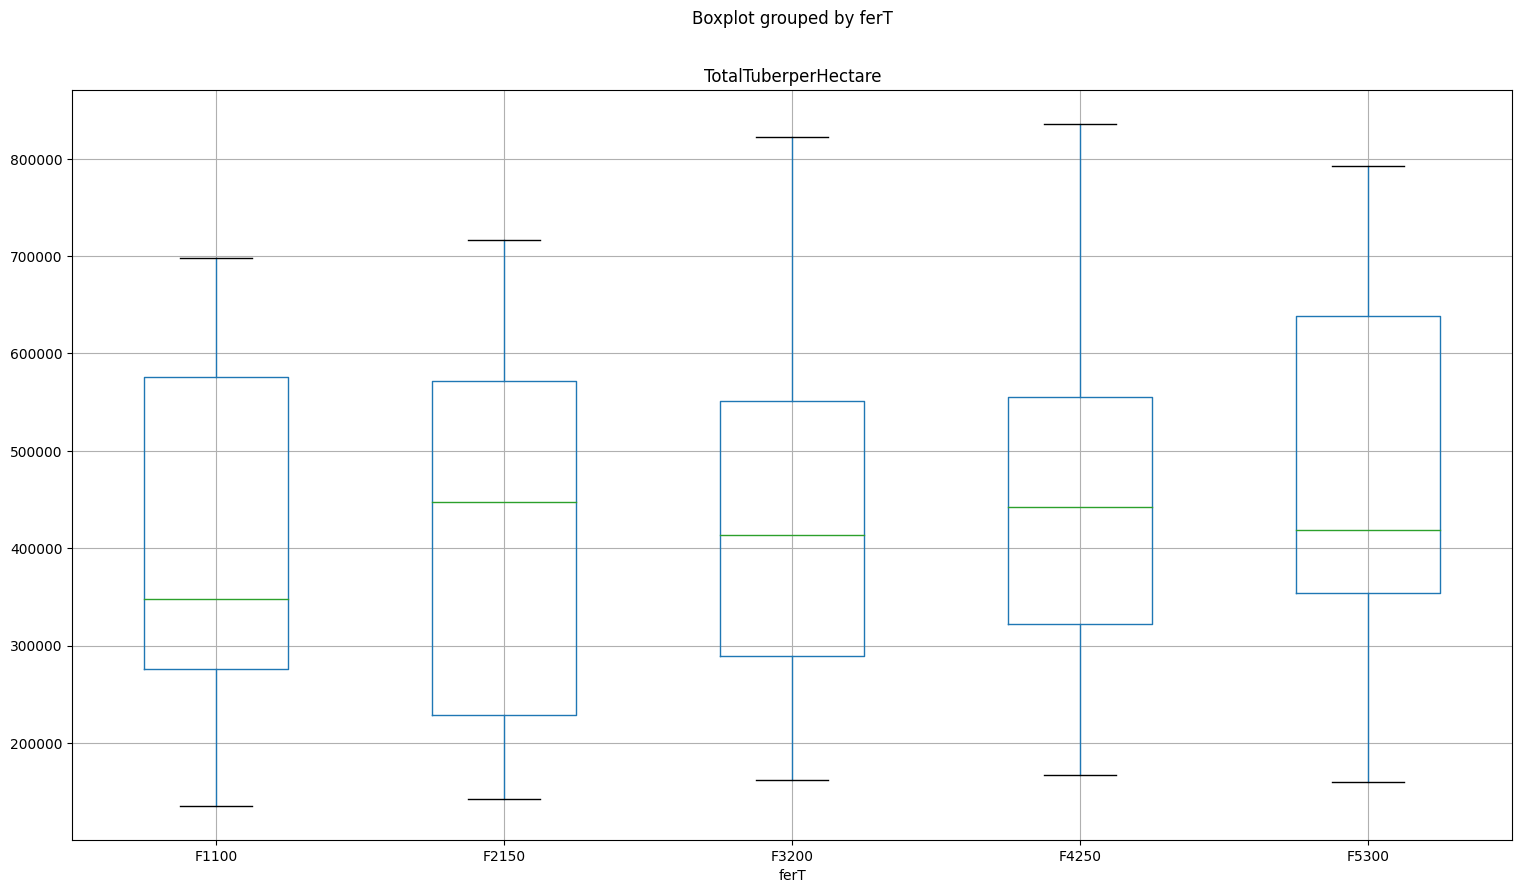

In [625]:
data.boxplot(column='TotalWeightperhectare', by='ferT', figsize=(18,10))
data.boxplot(column='TotalTuberperHectare', by='ferT', figsize=(18,10))

<Axes: title={'center': 'TotalTuberperHectare'}, xlabel='tillage '>

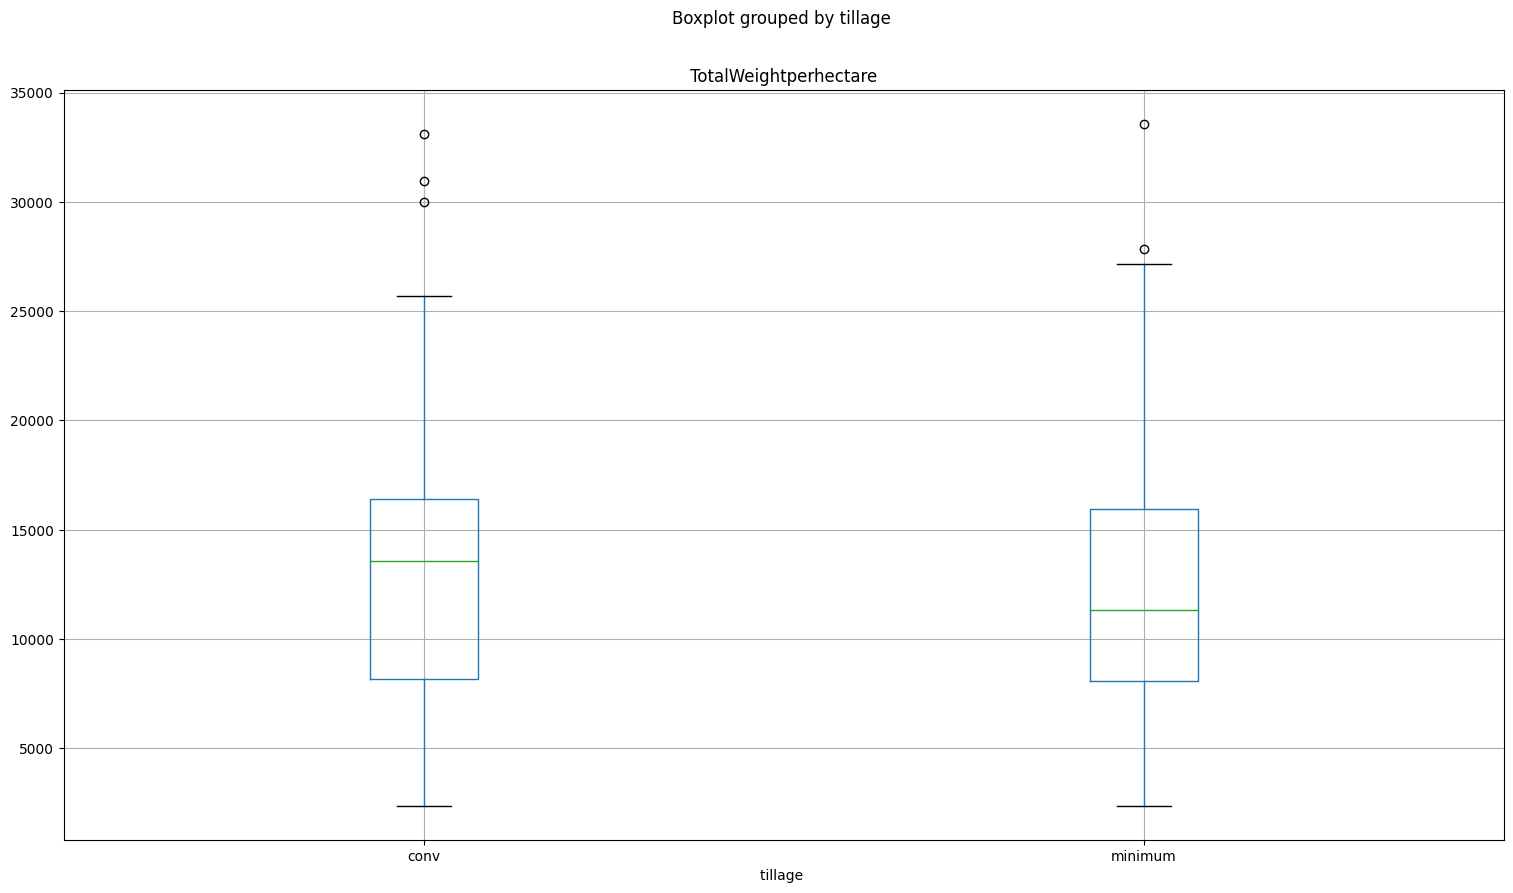

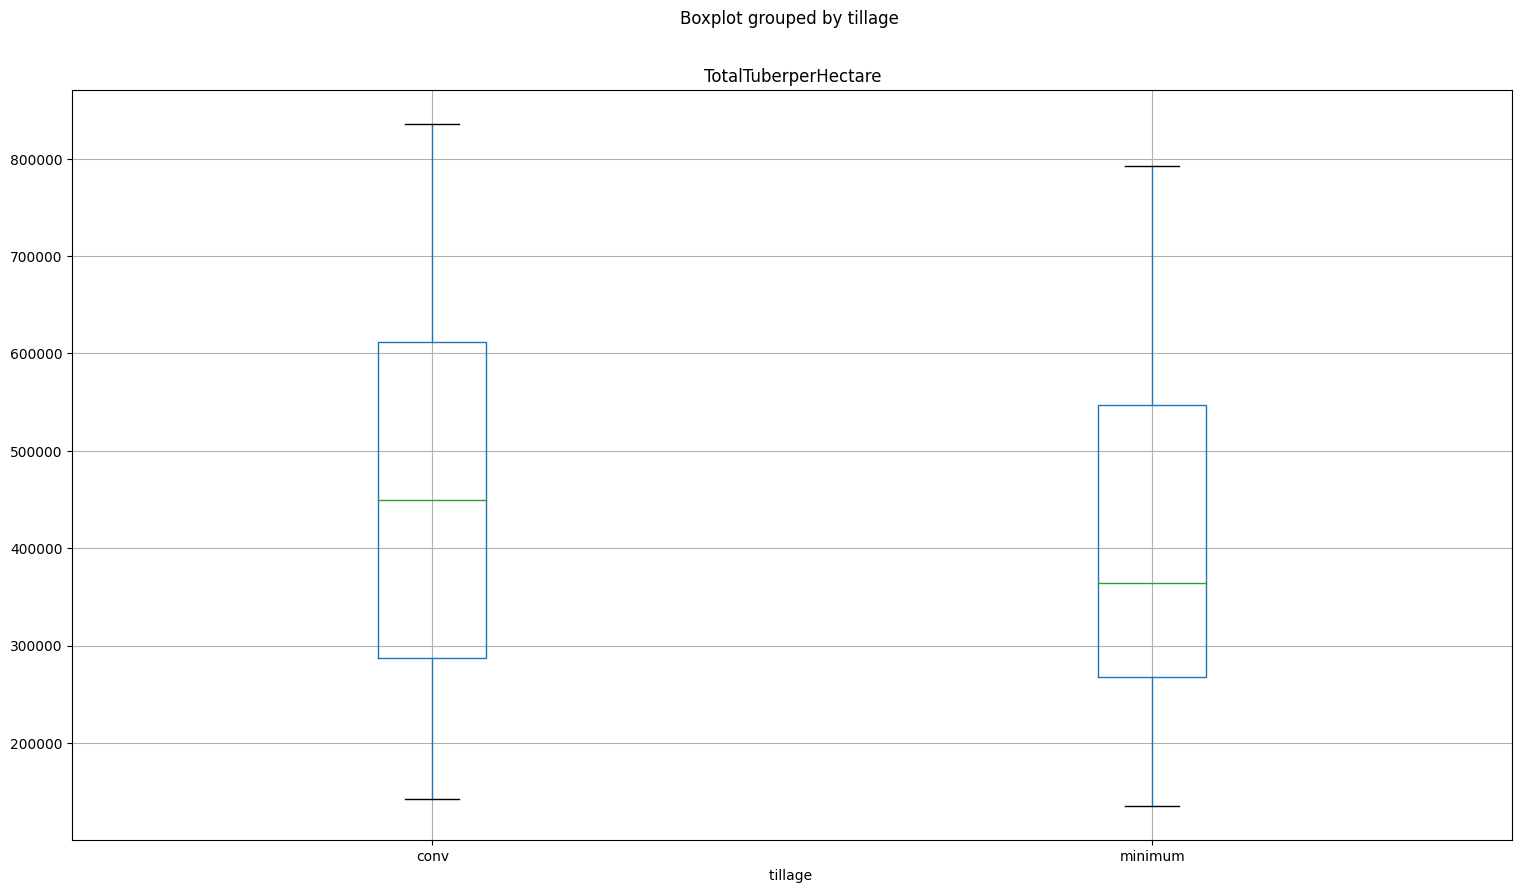

In [626]:
data.boxplot(column='TotalWeightperhectare', by='tillage ', figsize=(18,10))
data.boxplot(column='TotalTuberperHectare', by='tillage ', figsize=(18,10))

to further establish the actual relationship between these variables, i realise that the question requires full focus on
the location (locn) column since it asked for soroti farmers in particular.
below is to filter the location data and focus on soroti location as its their farmers who actually want the analysis

In [627]:
Soroti_CassavaFarmers=data[data['locn']== 1]
print(Soroti_CassavaFarmers)

    Sesn  locn  block  rep tillage    ferT  Plants_harvested  No_bigtubers   
0      2     1      1    1     conv  F2150                28             0  \
1      2     1      1    1     conv  F1100                28             0   
2      2     1      1    1     conv  F3200                28             2   
3      2     1      1    1     conv  F5300                28             6   
4      2     1      1    1     conv  F4250                28             3   
5      2     1      2    2     conv  F5300                28             6   
6      2     1      2    2     conv  F3200                28             0   
7      2     1      2    2     conv  F4250                28             0   
8      2     1      2    2     conv  F1100                28             1   
9      2     1      2    2     conv  F2150                28             1   
10     2     1      3    3     conv  F4250                28             4   
11     2     1      3    3     conv  F5300                28    

Question 3.      
Cassava farmers in Soroti would like to know the following aspects to help inform their farming practices;

a.       Does fertilizer application affect the projected “TotalWeightperhectare” and the "TotalTuberperHectare"

In [628]:
data_soroti=data[data['locn']==1]

Finding out how the fertiliser application affects the TotalWeightperhectare : using the ANOVA test

In [629]:
CategoricalPredictorList=['ferT']
FunctionAnova(inpData=data_soroti, 
              TargetVariable='TotalWeightperhectare', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

ferT is NOT correlated with TotalWeightperhectare | P-Value: 0.6025450971713018


[]

the anova test generates a p value: The p value is a number, calculated from a statistical test, that describes how likely you are to have found a particular set of observations if the null hypothesis were true.

the above result shows that the P-Value is greater than 0.05 and that means that there is no correlation. further explains that the fertiliser application by soroti farmers doesnt have an impact on the totalweight per hectare.

Finding out how the Fertilizer aplication influences the TotalTuberperHectare

In [630]:
CategoricalPredictorList=['ferT']
FunctionAnova(inpData=data_soroti, 
              TargetVariable='TotalTuberperHectare', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

ferT is NOT correlated with TotalTuberperHectare | P-Value: 0.8459527506077995


[]

the result from the Anova test above shows that the P-value is greater than 0.05 and further explains that there is no correlation between the fertiliser application and the totaltuber per hectare. therefore the fertiliser application by soroti farmers doesnt affect the projected total tuber per hectare.

Question 3.
b.      Does the tillage method (“conv” and “minimum”) affect the projected “TotalWeightperhectare” and "TotalTuberperHectare"

finding out how the tillage method('conv and 'minimum') affect the projected total weight per hectare.

In [631]:
CategoricalPredictorList=['tillage ']
FunctionAnova(inpData=data_soroti, 
              TargetVariable='TotalWeightperhectare', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

tillage  is NOT correlated with TotalWeightperhectare | P-Value: 0.5083543834181122


[]

from the above result of the Anova test, the tillage methods applied by the soroti farmers doesnt affect the totalweight per hectare: The calculated P-value shows a result being greater than 0.05 and that surely shows that there is no correlation between the selected variables

finding out how the tillage method('conv and 'minimum') affect the projected total tuber per hectare

In [632]:
CategoricalPredictorList=['tillage ']
FunctionAnova(inpData=data_soroti, 
              TargetVariable='TotalTuberperHectare', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

tillage  is NOT correlated with TotalTuberperHectare | P-Value: 0.4361290810511622


[]

from the above anova test, the tillage method used by the soroti farmers does not affect the totaltuber per hectare. the calculated P-value shows a result that is greater than 0.05 and that translates that there is no correlation between the two variables.